In [ ]:
pip install fireducks pandas matplotlib numpy duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0


In [ ]:
FIREDUCKS_FLAGS = "--benchmark-mode"


In [ ]:
import pandas as pd
import numpy as np

# Create 10 Million rows
df = pd.DataFrame({
    'user_id': np.random.randint(1, 1_000_000, 10_000_000),
    'amount': np.random.rand(10_000_000) * 1000,  # up to 1000
    'category': np.random.choice(['food', 'tech', 'fashion', 'travel'], 10_000_000),
    'timestamp': pd.date_range(start='2021-01-01', periods=10_000_000, freq='s')
})

# Save to CSV
df.to_csv('large_dataset.csv', index=False)

print("Dataset with 10 Million Rows Generated Successfully!")

Dataset with 10 Million Rows Generated Successfully!


1. Basic CSV Read & Filter


In [ ]:
import os
import time

## for Pandas
import pandas as pd
start_time = time.time()
pdf = pd.read_csv('large_dataset.csv')
print("Pandas Read Time:", time.time() - start_time)

## for FireDucks
import fireducks.pandas as fd
start_time = time.time()
fdf = fd.read_csv('large_dataset.csv')
print("FireDucks Read Time:", time.time() - start_time)

Pandas Read Time: 14.959361791610718
FireDucks Read Time: 0.03257012367248535


2. GroupBy Category


In [ ]:
## for Pandas
start = time.time()
pdf_grouped = pdf.groupby('category')['amount'].mean().reset_index()
print("Pandas GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_grouped = fdf.groupby('category')['amount'].mean().reset_index()
print("FireDucks GroupBy Time:", time.time() - start)

Pandas GroupBy Time: 1.316767692565918
FireDucks GroupBy Time: 0.0031881332397460938


3. Filter + GroupBy Together


In [ ]:
## for Pandas
start = time.time()
pdf_grouped = pdf.groupby('category')['amount'].mean().reset_index()
print("Pandas GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_grouped = fdf.groupby('category')['amount'].mean().reset_index()
print("FireDucks GroupBy Time:", time.time() - start)

Pandas GroupBy Time: 1.0748140811920166
FireDucks GroupBy Time: 0.0013272762298583984


4. Sorting Data by Amount (Descending)


In [ ]:
## for Pandas
start = time.time()
pdf_sorted = pdf.sort_values('amount', ascending=False).groupby('category').head(5)
print("Pandas Sort Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_sorted = fdf.sort_values('amount', ascending=False).groupby('category').head(5)
print("FireDucks Sort Time:", time.time() - start)

Pandas Sort Time: 10.235803842544556
FireDucks Sort Time: 0.0005152225494384766


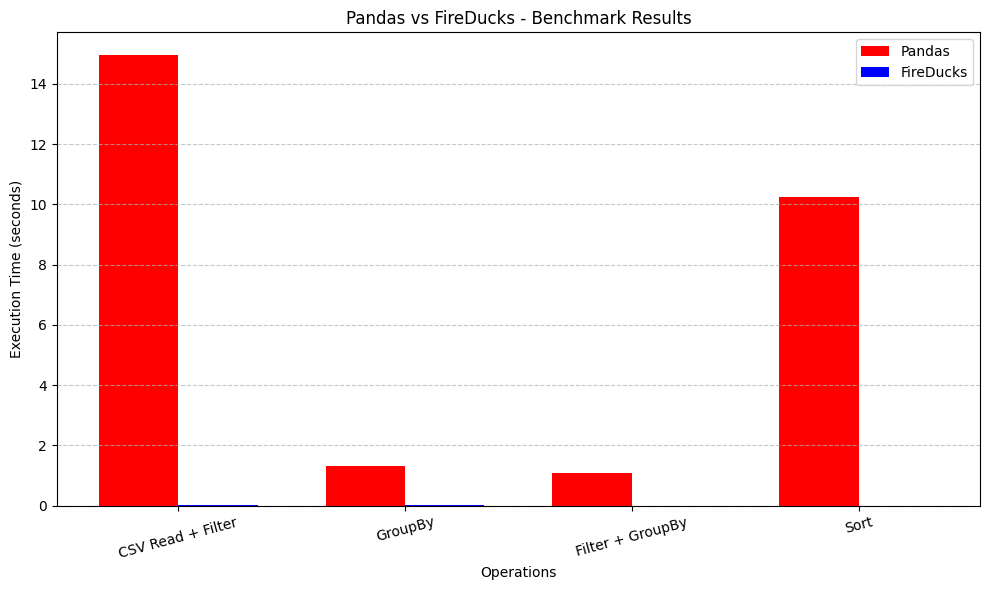

In [ ]:
import matplotlib.pyplot as plt

# Operation Names
operations = ['CSV Read + Filter', 'GroupBy', 'Filter + GroupBy', 'Sort']

# Execution Times (in seconds)
pandas_times = [14.959, 1.316, 1.074, 10.235]      # Pandas Times
fireducks_times = [0.032, 0.003, 0.001, 0.0005]     # FireDucks Times

x = range(len(operations))

plt.figure(figsize=(10, 6))
plt.bar(x, pandas_times, width=0.35, label='Pandas', color='red')
plt.bar([i + 0.35 for i in x], fireducks_times, width=0.35, label='FireDucks', color='blue')

plt.xlabel('Operations')
plt.ylabel('Execution Time (seconds)')
plt.title('Pandas vs FireDucks - Benchmark Results')
plt.xticks([i + 0.175 for i in x], operations, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()